# 0 - Input API Keys

In [ ]:
# OpenAI plateform connect
import getpass
API_key_OPENAI = getpass.getpass("Enter your API OpenAI Plateform key : ")

Enter your API OpenAI Plateform key : ··········


In [ ]:
# OpenAI Azure portal
import getpass
API_key = getpass.getpass("Enter your API OpenAI key : ")

Enter your API OpenAI key : ··········


In [ ]:
OPENAI_ENDPOINT = getpass.getpass("Enter your ENDPOINT : ")

Enter your ENDPOINT : ··········


# 1 - OpenAI Azure model deployement

In [ ]:
!pip install openai
!pip install langchain
!pip install python-dotenv
!pip install langchain-community langchain-core
!pip install -qU langchain-openai
!pip install --upgrade langchain

In [ ]:
import os
import openai
from openai import AzureOpenAI
os.environ['OPENAI_API_KEY'] = API_key
os.environ['OPENAI_API_TYPE'] = 'azure'
os.environ['OPENAI_API_VERSION'] = '2024-08-01-preview'
os.environ['AZ_OPENAI_ENDPOINT'] = OPENAI_ENDPOINT
os.environ['AZ_OPENAI_API_KEY']= API_key

In [ ]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZ_OPENAI_ENDPOINT"),
    openai_api_version="2024-02-15-preview",
    model_name="gpt-4o",
    openai_api_key=os.getenv("AZ_OPENAI_API_KEY"),
    openai_api_type="azure",
    temperature=0,
    deployment_name="gpt-4o-deploy",
    #streaming=True,
)


In [ ]:
prompt = "Tell me something funny"

for chunk in llm.stream(prompt):
    print(chunk.content, end="", flush=True)

Sure, here's a joke for you:

Why don't scientists trust atoms?

Because they make up everything!

# 2 - LangChain RAG

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


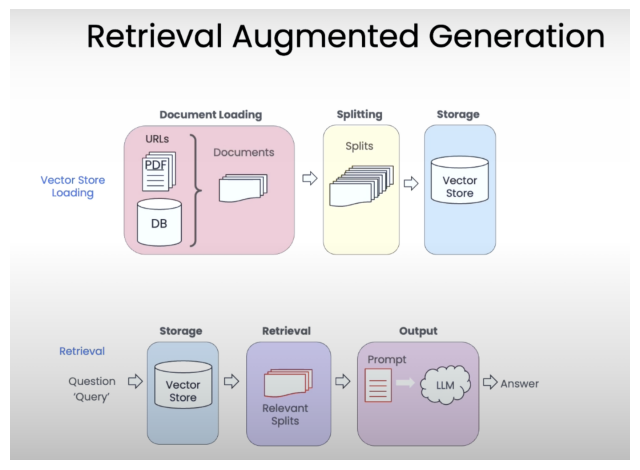

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/RAG_1.png")
plt.figure(figsize=(8, 7))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

## 1 - Document loader

Loaders
• Loaders deal with the specifics of accessing and converting data:
- Accessing,
Web Sites,
Data Bases,
YouTube arXiv.


- Data Types,
PDF,
HTML,
JSON,
Word, PowerPoint...

Returns a list of 'Document' objects:

In [ ]:
pip install pypdf

In [ ]:
pip install -U langchain-community

In [ ]:
from langchain.document_loaders import PyPDFLoader

Inject Groupama rapport 2023

In [ ]:
loader = PyPDFLoader("/content/drive/MyDrive/Data/Groupama23.pdf")
pages = loader.load()

In [ ]:
len(pages)

16

In [ ]:
pages[1].metadata

{'source': '/content/drive/MyDrive/Data/Groupama23.pdf', 'page': 1}

In [ ]:
type(pages[1])

langchain_core.documents.base.Document

In [ ]:
pages[1]

Document(metadata={'source': '/content/drive/MyDrive/Data/Groupama23.pdf', 'page': 1}, page_content='On ne peut pas prévoir de quoi demain sera fait.  \nPourtant, le groupe Groupama a toujours été tourné  \nvers l’avenir en cherchant à comprendre et à s’adapter  \naux mutations de la société.\nCar, dès aujourd’hui, on peut tenter de mettre en place  \ndes solutions pour l’avenir. Notre culture de l’innovation,  \nnotre capacité d’écoute et d’analyse nous positionnent \ncomme un Groupe qui invente et se réinvente.\nCe rapport annuel, illustré par les enfants  \nde nos collaborateurs, parle d’avenir… et encore plus \ndans sa version digitale.  \nRetrouvez notre vision du futur, et découvrez  \nnos innovations qui façonnent le monde de demain.\nLe monde change,  \nse transforme, \névolue sans cesse. \n240429_GROUPAMA_RA_Fanzine_FR_VG.indd   2240429_GROUPAMA_RA_Fanzine_FR_VG.indd   2 29/04/2024   15:0129/04/2024   15:01')

In [ ]:
pages[2]

Document(metadata={'source': '/content/drive/MyDrive/Data/Groupama23.pdf', 'page': 2}, page_content='Si l’on parlait d’avenir ?\nCOMMENT LE GROUPE GROUPAMA \nCOMPTE-T-IL ATTEINDRE SON \nAMBITION D’ÊTRE LE CHAMPION DE \nL ’ACCOMPAGNEMENT DE SES CLIENTS ? \nFRANÇOIS SCHMITT \nPrésident de Groupama \nAssurances Mutuelles\nNous sommes dans un monde qui s’accé-\nlère, avec des impacts qui nous sollicitent \nde plus en plus souvent et de plus en plus \nfortement, qu’ils soient climatiques, éco-\nnomiques ou sociétaux. Le coût de la sinis tra    -\nlité s’accroît et donc, assez mécaniquement, \nle coût de l’assurance augmente. Si nous \nvoulons que nos assurés sociétaires conti-\nnuent à nous faire confiance, il faut impéra ti-\nvement maximiser notre qualité de service. \nAgir en ce sens est essentiel aujour d’hui, ce \nsera vital demain pour conserver la confiance \nde nos clients.\nNotre ambition, c’est d’être le Groupe \nmutualiste champion de l’accompagne -\nment de ses clients. Notre pl

## 2 - Parsing

### 2.2 - Recursive splitting

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

LangChain Splitters:
- CharacterTextSplitter :  divise le texte en morceaux de taille définie. Ne prend pas en considération la structure du text. Pourrait couper en plein milieu de phrases ou de blocs logiques.

- RecursiveCharacterTextSplitter: divise le texte de manière hiérarchique en utilisant plusieurs séparateurs. divise par paragraphe (\n\n), puis par phrase (.), et finalement par mot ( ) pour s'assurer que les morceaux soient cohérents et ne dépassent pas 50 caractères.





In [ ]:
chunk_size =26
chunk_overlap = 4

In [ ]:
# implementation Option 1:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap)

In [ ]:
# implementation Option 2:
splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "."],  # Diviser par paragraphe, puis phrase, puis mot
    chunk_size=50,                  # Taille maximale de chaque morceau
    chunk_overlap=15)                 # Chevauchement optionnel pour la cohérence des morceaux

In [ ]:
chunks = splitter.split_text(pages[4].page_content)

In [ ]:
# Liste tous les attributs et méthodes de l'objet
print(dir(pages[1]))

['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_validator__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_args__', '__repr_name__', '__repr_str__', '__rich_r

In [ ]:
print(pages[1].__dict__)

{'id': None, 'metadata': {'source': '/content/drive/MyDrive/Data/Groupama23.pdf', 'page': 1}, 'page_content': 'On ne peut pas prévoir de quoi demain sera fait.  \nPourtant, le groupe Groupama a toujours été tourné  \nvers l’avenir en cherchant à comprendre et à s’adapter  \naux mutations de la société.\nCar, dès aujourd’hui, on peut tenter de mettre en place  \ndes solutions pour l’avenir. Notre culture de l’innovation,  \nnotre capacité d’écoute et d’analyse nous positionnent \ncomme un Groupe qui invente et se réinvente.\nCe rapport annuel, illustré par les enfants  \nde nos collaborateurs, parle d’avenir… et encore plus \ndans sa version digitale.  \nRetrouvez notre vision du futur, et découvrez  \nnos innovations qui façonnent le monde de demain.\nLe monde change,  \nse transforme, \névolue sans cesse. \n240429_GROUPAMA_RA_Fanzine_FR_VG.indd   2240429_GROUPAMA_RA_Fanzine_FR_VG.indd   2 29/04/2024   15:0129/04/2024   15:01', 'type': 'Document'}


In [ ]:
print(chunks[1])

. POUVEZ-VOUS  
NOUS PARLER DE CETTE DÉMARCHE 
ET NOUS PRÉCISER COMMENT  
VOUS PENSEZ RELEVER CES DÉFIS 
OLIVIER LARCHER ?
OLIVIER LARCHER
Directeur général  
délégué de Groupama  
Assurances Mutuelles 
Il est exact que notre environnement nous 
oblige à nous adapter pour préserver notre 
modèle unique sur le marché


In [ ]:
type(chunks)

list

In [ ]:
chunks

['POUR RÉPONDRE AUX DÉFIS POSÉS \nPAR UN ENVIRONNEMENT DE PLUS EN \nPLUS COMPLEXE, VOUS AVEZ DÉCIDÉ \nDE REVOIR VOTRE FEUILLE DE ROUTE \nSTRATÉGIQUE',
 '. POUVEZ-VOUS  \nNOUS PARLER DE CETTE DÉMARCHE \nET NOUS PRÉCISER COMMENT  \nVOUS PENSEZ RELEVER CES DÉFIS \nOLIVIER LARCHER ?\nOLIVIER LARCHER\nDirecteur général  \ndélégué de Groupama  \nAssurances Mutuelles \nIl est exact que notre environnement nous \noblige à nous adapter pour préserver notre \nmodèle unique sur le marché',
 '. Avant d’évo-\nquer les travaux conduits collectivement \npour remodeler notre stratégie, je voudrais \nrevenir sur quelques réalisations impor -\ntantes menées à bien par nos équipes \nen 2023',
 '. Nous avons continué, en 2023, à \nagir pour la qualité de service, c’est un point \nclé',
 '. Nous avons, par exemple, mis en place \nla déclaration de sinistre en ligne, en phase \navec les attentes de nos sociétaires, ainsi \nque le parcours d’assistance digitalisé : \nl’assistance intervient lors de moments d

### 2.3 - Token splitting
Not relevant to keep the meaning

### 2.4 - Context aware splitting (MarkDown)

Aims to keep text with common context together.

For this, use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks.



In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [ ]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n
## Chapter 2\n\n \
Hi this is Molly"""

In [ ]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [ ]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on)


In [ ]:
md_header_splits = markdown_splitter.split_text(markdown_document)

In [ ]:
md_header_splits[1]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'}, page_content='Hi this is Lance')

Output is a combination between headers_to_split_on and headers_to_split_on.

## 3 - Embedding - OpenAI Platform ( https://platform.openai.com/api-keys )

Indexation des vecteurs d embeddings, on crée une structure de données optimisée qui permet de retrouver rapidement les vecteurs les plus proches pour une requête donnée. Les techniques d'indexation incluent souvent :

- Structures de données spécialisées : Par exemple, des arbres k-d (k-dimensional) ou approximate nearest neighbor (ANN).

- Approximation : Des algorithmes comme FAISS (Facebook AI Similarity Search) ou ScaNN (Scalable Nearest Neighbors) sont conçus pour retrouver les vecteurs voisins de manière approximative, mais très rapide, ce qui est suffisant pour de nombreux cas d’usage de RAG.


L index ne contient pas les documents eux-mêmes mais une structure de données optimisée qui facilite la recherche des voisins les plus proches de la requête dans l'espace des embeddings.



In [ ]:
pip install docarray tiktoken

In [ ]:
import os
from langchain.indexes import VectorstoreIndexCreator
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch # do not require to connect to external database.
from getpass import getpass

In [ ]:
# Créer une instance des embeddings OpenAI
embeddings = OpenAIEmbeddings(
    model='text-embedding-ada-002',
    openai_api_key=API_key_OPENAI
)


<ipython-input-31-7fce93398368>:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(


Pour mesurer la similarité entre deux vecteurs d’embedding, on utilise souvent le produit scalaire ou la similarité cosinus.

Ces métriques permettent d’obtenir un score indiquant la similarité entre les phrases. Plus ce score est élevé, plus les phrases sont considérées comme similaires.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sentence1 = "" #input text
sentence2 = ""#input text

In [ ]:
emb1 = embeddings.embed_query(sentence1)
emb2 = embeddings.embed_query(sentence2)

In [ ]:
np.dot(emb1, emb2)

In [ ]:
similarity_score = cosine_similarity([emb1], [emb2])

In [ ]:
print(similarity_score)

## 4 - Vectorstore with Chroma

Used to store these embedding

In [ ]:
pip install tiktoken

In [ ]:
from langchain.vectorstores import Chroma # here use Chroma integrated vector Store


In [ ]:
vectordb = Chroma.from_texts( # in course used from documents.
    texts=chunks,
    embedding=embeddings,
)

In [ ]:
print(Chroma.__dict__)

{'__module__': 'langchain_community.vectorstores.chroma', '__annotations__': {'_LANGCHAIN_DEFAULT_COLLECTION_NAME': 'str'}, '__doc__': '.. deprecated:: 0.2.9 Use ``:class:`~langchain_chroma.Chroma``` instead.\n\n`ChromaDB` vector store.\n\nTo use, you should have the ``chromadb`` python package installed.\n\nExample:\n    .. code-block:: python\n\n            from langchain_community.vectorstores import Chroma\n            from langchain_community.embeddings.openai import OpenAIEmbeddings\n\n            embeddings = OpenAIEmbeddings()\n            vectorstore = Chroma("langchain_store", embeddings)', '_LANGCHAIN_DEFAULT_COLLECTION_NAME': 'langchain', '__init__': <function Chroma.__init__ at 0x7cbe1b605990>, 'embeddings': <property object at 0x7cbe1b7fcd10>, '_Chroma__query_collection': <function Chroma.__query_collection at 0x7cbe1b604af0>, 'encode_image': <function Chroma.encode_image at 0x7cbe1b6049d0>, 'add_images': <function Chroma.add_images at 0x7cbe1b604b80>, 'add_texts': <funct

In [ ]:
print(vectordb._collection.count()) #same as splits that we have

51


In [ ]:
question = "Groupama est tourné vers le passé ou l'avenir ?"

In [ ]:
docs = vectordb.similarity_search(question,k=3)

In [ ]:
len(docs)

3

In [ ]:
docs

[Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance'),
 Document(metadata={}, page_content='. Avant d’évo-\nquer les travaux conduits collectivement \npour remodeler notre stratégie, je voudrais \nrevenir sur quelques réalisations impor -\ntantes menées à bien par nos équipes \nen 2023'),
 Document(metadata={}, page_content='.indd   5240429_GROUPAMA_RA_Fanzine_FR_VG')]

## 5 - Retreival

1 - MMR algo: Algo query based on similarity and diversity

2 - LLM aided Retreival / self query : useful for including metadata to your content. Here use the LLM to convert question to a query.

3 -  Compression: Increase the number of results you can put in the context by shrinking the responses to only the relevant information.

### 5.1 - Similarity Search

In [ ]:
pip install -U langchain-community

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
persist_directory = 'docs/chroma/'

In [ ]:
vectordb = Chroma(
    persist_directory=persist_directory,
    embedding_function=embeddings
)

In [ ]:
print(vectordb._collection.count())

0


In [ ]:
texts = [## input,
]

In [ ]:
smalldb = Chroma.from_texts(texts, embedding=embeddings)

In [ ]:
question = "Tell me about mushroom"

In [ ]:
smalldb.similarity_search(question, k=2)

[Document(metadata={}, page_content='A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.'),
 Document(metadata={}, page_content='The Amanita phalloides has a large and imposing epigeous (aboveground) fruiting body (basidiocarp).')]

### 5.2 - Addressing Diversity: Maximum marginal relevance

In [ ]:
smalldb.max_marginal_relevance_search(question,k=2,
                                      fetch_k=3) # here diversity factor

[Document(metadata={}, page_content='A mushroom with a large fruiting body is the Amanita phalloides. Some varieties are all-white.'),
 Document(metadata={}, page_content='A. phalloides, a.k.a Death Cap, is one of the most poisonous of all known mushrooms.')]


`Maximum marginal relevance` strives to achieve both relevance to the query *and diversity* among the results.

In [ ]:
question = "what did they say about matlab?"
docs_ss = vectordb.similarity_search(question,k=3)
docs_ss

[]

In [ ]:
docs_mmr = vectordb.max_marginal_relevance_search(question,k=3)
docs_mmr

[]

### 5.3 - Addressing Specificity: working with metadata

Vectorstores support operations on `metadata`. It provides context for each embedded chunk.

Example : a question about the third lecture can include results from other lectures as well.

#### Option 1 : manually specifing this

In [ ]:
docs = vectordb.similarity_search(question,
    k=3 #,
    #filter={"source":"docs/cs229_lectures/MachineLearning-Lecture03.pdf"} )

#### Option 2: using metadata using self-query retreival

We often want to infer the metadata from the query itself. To address this, we can use `SelfQueryRetriever`, which uses an LLM to extract:

1. The `query` string to use for vector search
2. A metadata filter to pass in as well

Most vector databases support metadata filters, so this doesn't require any new databases or indexes.

In [ ]:
pip install lark

In [ ]:
from langchain.llms import OpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo

In [ ]:
# trame
metadata_field_info = [
    AttributeInfo(
        name="source",
        description="The lecture the chunk is from, should be one of `docs/Lecture01.pdf`, `docs/Lecture02.pdf`, or `docs/Lecture03.pdf`",
        type="string",
    ),
    AttributeInfo(
        name="page",
        description="The page from the lecture",
        type="integer",
    ),
]

In [ ]:
from langchain.chat_models import ChatOpenAI

client = ChatOpenAI(model_name="gpt-4o",
    api_key=API_key_OPENAI
)
#client.models.list()


<ipython-input-68-0694ded43469>:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  client = ChatOpenAI(model_name="gpt-4o",


In [ ]:
document_content_description = "Lecture notes"

retriever = SelfQueryRetriever.from_llm(
    client,
    vectordb,
    document_content_description,
    metadata_field_info,
    verbose=True)

In [ ]:
docs = retriever.get_relevant_documents(question)

<ipython-input-70-6ed304eeafec>:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(question)


In [ ]:
for d in docs:
    print(d.metadata)

#### Option 3:  Compression

Another approach for improving the quality of retrieved docs is compression.

Information most relevant to a query may be buried in a document with a lot of irrelevant text.

Passing that full document through your application can lead to more expensive LLM calls and poorer responses.

Contextual compression is meant to fix this.

In [ ]:
pip install langchain-community langchain-core

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.chat_models import ChatOpenAI

In [ ]:
llm = ChatOpenAI(
    model_name="gpt-4o",
    openai_api_key= API_key_OPENAI )


In [ ]:
compressor = LLMChainExtractor.from_llm(llm)

In [ ]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever()
)

In [ ]:
question = "what did they say about matlab?"
compressed_docs = compression_retriever.get_relevant_documents(question)
print(compressed_docs)
#pretty_print_docs(compressed_docs)

[]


## 6 - Question Answering

### 6.1 - Introduction describing the goal

This come out after retreiving

If there are a lot of ducuments that can't pass trough the same context windows:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


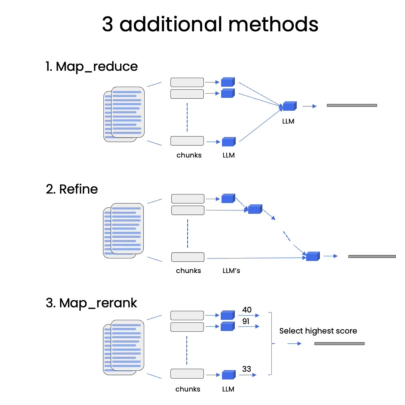

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/drive/MyDrive/Image_notebooks/3methods.png")
plt.figure(figsize=(6, 5))  # Taille de l'image (largeur, hauteur) en pouces
plt.imshow(image)
plt.axis("off")  # Masquer les axes
plt.show()

### 6.2 - Setup env

In [ ]:
pip install chromadb tiktoken

In [ ]:
pip install -U langchain-community

In [ ]:
from getpass import getpass
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch
import os
from langchain.vectorstores import Chroma

In [ ]:
# Créer une instance des embeddings OpenAI
embeddings = OpenAIEmbeddings(
    model='text-embedding-ada-002',
    openai_api_key=API_key_OPENAI
)


In [ ]:
vectordb # defined in the section

In [ ]:
print(vectordb._collection.count())

0


In [ ]:
question = "Quelle est l'ambition de Groupama pour l'avenir ?"

In [ ]:
docs = vectordb.similarity_search(question, k=3 )
len(docs)

3

In [ ]:
docs

[Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance'),
 Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance'),
 Document(metadata={}, page_content='. Les initia-\ntives ont été nombreuses, les actions \nconcrètes aussi !\nPour réaliser notre ambition, « Bâtir le \nGroupe mutualiste champion de l’accom-\npagnement des clients », nous devons aller \nencore plus loin, ensemble')]

### 6.3 - RetrievalQA chain

In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-4o",
    openai_api_key= API_key_OPENAI
)

In [ ]:
from langchain.chains import RetrievalQA
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [ ]:
resultat = qa_chain({"query" :question})

In [ ]:
resultat

{'query': "Quelle est l'ambition de Groupama pour l'avenir ?",
 'result': 'L\'ambition de Groupama pour l\'avenir est de "bâtir le groupe mutualiste champion de l\'accompagnement des clients".'}

Mapreduce a de nombreuses limitations:
- Perte de contexte global lors de la réduction
- doublons et incohérences
- Difficulté à maintenir une cohérence narrative ou logique
- Fragmentation excessive des données


### 6.3 - With a Prompt

In [ ]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, /n
just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. /n
Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [ ]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
question = "Quelle est l'ambition de Groupama pour l'avenir ?"

In [ ]:
result = qa_chain({"query": question})

In [ ]:
result["result"]

"L'ambition de Groupama pour l'avenir est de bâtir un groupe mutualiste champion de l'accompagnement des clients. Merci pour votre question !"

In [ ]:
result["source_documents"][0]

Document(metadata={}, page_content='.\nGroupama, c’est aussi des filiales en France \net à l’international qui nous aident à être \nmeilleurs, à capter de la croissance, à diver-\nsifier les risques, à gagner en efficacité, à \nproposer des services innovants qui intè-\ngrent nos offres d’assurance')

### 6.4 - RetrievalQA chain types

Before stuff method. If many doc will not fit in the context method use : Map reduce, refine or

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="map_reduce"
)

In [ ]:
result = qa_chain_mr({"query": question})

In [ ]:
result["result"]

'L\'ambition de Groupama pour l\'avenir est de "bâtir le Groupe mutualiste champion de l’accompagnement des clients."'

Mapreduce can handles many documents, bu with cost of limitations :
- Perte de contexte global
- Difficulté à maintenir une cohérence narrative
- Fragmentation excessive des données
- si informations dans plusieurs doc pas sur de les avoir a la fin dans la fenetre de context

Go to https://www.langchain.com/langsmith the LangChain webUI

### 6.5 - RetrievalQA limitations


Testing Refine chain offers to combine informations sequentially. It s carrying more information than the map_reduce

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="refine"
)

In [ ]:
result = qa_chain_mr({"query": question})

In [ ]:
result["result"]

"L'ambition de Groupama pour l'avenir est de bâtir le groupe mutualiste champion de l'accompagnement des clients. Pour réaliser cette ambition, Groupama vise à être meilleurs, à capter de la croissance, à diversifier les risques, à gagner en efficacité, et à proposer des services innovants qui intègrent leurs offres d’assurance, en s'appuyant sur leurs filiales en France et à l'international. Les initiatives ont été nombreuses et les actions concrètes aussi, mais pour atteindre cet objectif, il est essentiel que Groupama aille encore plus loin en multipliant les efforts et en travaillant ensemble."

Important : QA fails to preserve conversational history and dont have memory


## 7  - Chat (with history)

### 7.1 - memory

In [ ]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(
    memory_key ="chat_history",
    return_messages = True
)

<ipython-input-144-bfd9a5c69cc2>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(


### 7.2 - ConversationalRetrievalChain

In [ ]:
from langchain.chains import ConversationalRetrievalChain
retriever=vectordb.as_retriever()
qa = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory=memory
)

Here bellow we , do not just add a memory, but we add a step that take a history and a new question and combine it into an stand-alone question to pass into a vector store

In [ ]:
question = "c est quoi Groupama ?"
result = qa({"question": question})
result['answer']

"Groupama est une entreprise qui possède des filiales en France et à l'international. Ces filiales aident Groupama à améliorer ses performances, à capter de la croissance, à diversifier les risques, à gagner en efficacité, et à proposer des services innovants intégrés à ses offres d'assurance."

### 7.3 - Create a chatbot
